In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# The following import configures Matplotlib for 3D plotting.
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm
import torch.jit._builtins as tjb
from scipy.special import lpmv
import torch

In [2]:
tjb.math.factorial(1.5)

ValueError: factorial() only accepts integral values

In [3]:
range(-5,5)[9]

4

In [4]:
a = [0, 1, 2, 3]

In [5]:
coef = [116.40520943, -4.51331063,  -1.22070776, 2.53049672, 1.25615844,\
   1.59720443,  28.4781262,   -0.33878004,  -4.02484515]

In [4]:
coef = [ 1.1641e+02, -4.5133e+00, -1.2207e+00,  2.5304e+00,  1.2562e+00,
         1.5972e+00,  2.8478e+01, -3.3876e-01, -4.0248e+00, -1.3099e+00,
         8.2582e-01, -7.3362e-01,  2.0641e+00, -1.2145e+00, -7.4109e-01,
        -2.9851e+00,  1.5615e-01, -5.8619e-01,  6.8383e-01, -6.0210e-01,
         9.3158e+00,  6.1056e-01, -1.1432e+00, -1.3014e+00,  3.0312e+00,
         2.4074e+00,  1.2658e-01, -6.6127e-01, -4.6614e-01,  7.0604e-01,
         1.0466e+00, -1.1268e+00, -6.1773e-01, -1.6800e+00, -1.2789e+00,
        -6.3853e-01, -6.1669e-01, -6.9443e-01, -5.7530e-01, -3.4175e-01,
         6.8189e-01, -8.1126e-01,  3.3709e+00,  1.5084e-01, -2.1958e-01,
        -8.6612e-01,  1.7996e+00, -2.5033e-01, -9.3355e-01, -1.9907e-01,
         2.7847e-01,  1.4560e+00,  4.2285e-01, -6.0106e-01, -5.3946e-01,
         5.1205e-01,  2.7113e-01, -4.6973e-01, -4.3039e-01, -1.1173e+00,
        -8.7920e-01, -2.3119e-01,  8.4185e-02, -8.6129e-01, -1.0549e-01,
        -9.1023e-02, -1.6747e-01, -4.9338e-01, -2.8680e-01, -6.6550e-02,
         2.4039e-01, -1.4973e-01,  1.1219e+00,  5.2580e-02, -1.4318e-01,
        -3.6527e-01,  6.9411e-01,  1.9737e-01, -4.7317e-01,  3.5967e-01,
        -8.9395e-03,  1.1817e+00,  5.4227e-02, -1.4636e-02,  1.9901e-02,
         9.9262e-01,  2.6778e-01, -4.8874e-01, -1.2356e-01,  7.6717e-02,
        -2.5340e-02, -3.0001e-01, -1.8780e-01, -7.3781e-01, -3.5893e-01,
        -3.3195e-01,  9.2400e-02, -4.8071e-01, -4.3719e-01,  2.1022e-01,
        -1.2973e-02, -3.0289e-01, -2.5603e-01, -2.1053e-01, -1.9185e-01,
        -3.0926e-01, -6.1280e-02,  2.9697e-03, -1.0761e-01, -7.3040e-02,
         3.3188e-01,  2.8883e-02, -1.3287e-01, -2.3420e-01,  3.0887e-01,
         3.0193e-01, -1.7764e-01,  3.4344e-01,  6.0186e-02,  2.5114e-02,
        -9.2880e-02, -4.5466e-01,  5.7405e-04,  4.4702e-01,  1.0218e-01,
         1.1584e-01,  5.5525e-02,  7.9781e-01,  1.4135e-01, -3.5462e-01,
         1.4689e-01, -5.8344e-02, -8.0402e-02, -2.0618e-01, -7.7795e-02,
        -4.9197e-01, -2.5086e-01, -1.9851e-01,  1.2964e-02, -1.1765e-01,
        -2.2999e-01,  1.0492e-02,  2.5746e-01, -2.0144e-01, -5.6196e-01,
        -1.9659e-01,  8.0035e-02, -5.6596e-02, -6.8007e-02, -1.9490e-01,
        -2.2006e-01, -1.6214e-01, -1.1599e-02, -2.1521e-02, -1.9043e-01,
         1.4375e-02,  1.8555e-01,  6.4625e-02, -7.8023e-02, -7.9174e-02,
         1.4700e-01,  2.5092e-01, -5.9899e-02,  1.8659e-01, -4.9380e-02,
         1.7934e-01,  1.3203e-01,  2.6821e-01, -1.6435e-02,  1.0972e-01,
         1.9658e-01, -8.5247e-02,  1.5100e-01,  1.2307e-01,  9.8064e-02,
         1.0099e-01, -1.0648e-02,  5.6942e-01,  1.2121e-02, -1.7664e-01,
         2.2639e-01, -1.4936e-01, -7.9067e-02, -1.8780e-01,  1.3491e-03,
        -3.0808e-01, -1.3369e-02, -1.1402e-01, -1.2221e-02,  2.0695e-02,
        -1.8247e-01, -9.2898e-02,  1.7584e-01, -6.7241e-03,  5.0808e-02,
         1.4643e-01,  4.1559e-02, -1.7706e-02, -3.3159e-01, -2.3859e-02,
         4.3258e-02,  1.0781e-01, -1.0679e-02, -1.3682e-01, -1.4469e-01,
        -4.9783e-02,  4.1417e-02, -3.6952e-02, -1.7025e-01,  7.3019e-02,
         2.1862e-01,  1.3835e-02, -2.2306e-02, -2.2884e-02,  8.1060e-02,
         2.3645e-01, -3.8986e-02,  5.7291e-02, -7.2268e-02,  9.7338e-02,
         7.4063e-02,  1.7262e-01,  3.3656e-02, -4.9947e-02, -4.7586e-02,
        -9.5339e-02, -1.1102e-01,  3.8455e-02,  1.2277e-01, -2.4097e-02,
         1.6591e-01,  5.5874e-03,  1.1047e-01,  5.0822e-02,  1.8274e-03,
         3.5516e-01,  2.3687e-02, -4.5473e-02,  2.5817e-01, -1.2863e-01,
        -8.1075e-02, -9.1108e-02,  8.4395e-03, -1.3322e-01,  6.7577e-02,
        -7.5107e-02, -4.8557e-03,  4.6515e-02, -1.2675e-01, -1.6499e-01,
         1.5687e-01,  3.5106e-02, -7.9514e-02,  1.5128e-01, -8.7205e-03,
        -1.3081e-01, -1.8644e-01, -6.7976e-03,  3.5424e-02, -6.7019e-02,
        -1.3097e-01, -4.6636e-02, -1.9459e-02,  3.5790e-02, -3.2224e-02,
        -1.0063e-01, -1.9750e-01,  1.3894e-02,  7.6855e-03, -1.8925e-03,
        -1.6152e-01,  1.2058e-01,  2.2272e-01, -4.7815e-02, -1.3956e-02,
        -2.6888e-02,  6.7284e-02,  2.0101e-01, -2.9138e-02,  1.2722e-02,
        -1.0901e-01,  2.0890e-03, -4.0376e-02,  4.5695e-02, -6.1598e-03,
        -1.5801e-01,  3.1907e-02,  2.2115e-02,  9.5621e-02,  1.8182e-01,
         7.7823e-02, -2.2491e-02, -3.4016e-02,  2.6931e-02,  1.7254e-02,
        -6.4505e-02,  1.0128e-01,  3.3644e-03,  5.4828e-02, -1.2063e-04,
         1.0076e-02,  1.9526e-01,  3.1070e-02,  2.4672e-02,  1.9069e-01,
        -5.6555e-02, -6.0717e-02, -3.4192e-02,  2.3300e-02, -1.4590e-02,
         8.0165e-02, -3.8606e-02, -7.0129e-03,  6.3564e-02, -8.7510e-02,
        -7.5095e-02,  1.3444e-01,  1.2013e-01, -1.0361e-01,  6.4733e-02,
        -2.0260e-02, -1.3279e-01,  4.9085e-02,  8.8889e-02,  1.1069e-01,
        -2.7441e-02, -9.1138e-03,  5.5724e-02, -2.0744e-02, -1.5666e-01,
        -5.7550e-02, -4.2030e-03, -3.5733e-02,  5.5772e-03, -5.5485e-02,
        -5.8257e-02, -1.3567e-01,  2.6436e-02, -1.8547e-02,  2.4980e-02,
        -8.9152e-02,  1.2780e-01,  1.4757e-01, -8.1553e-02, -1.2290e-02,
        -2.2310e-02,  9.5969e-02,  1.5176e-01,  1.8489e-02, -4.7094e-02,
        -7.4854e-02, -2.6153e-02, -4.7675e-02, -5.2279e-03, -6.2720e-03,
        -4.0596e-02, -7.9191e-02, -1.3673e-02, -1.9239e-02,  1.3131e-02,
        -7.8643e-02, -4.8531e-03,  3.4483e-02,  8.3510e-02, -1.2165e-02,
        -5.2699e-02, -1.0540e-02,  2.7745e-02, -3.0627e-02, -1.1753e-01,
         1.2495e-01,  6.6750e-02,  4.9453e-02,  2.5902e-02,  3.2951e-02,
         1.3119e-01,  9.5458e-03,  8.9066e-02,  1.7216e-01,  7.4870e-02,
        -8.7194e-02,  8.0267e-04, -4.5847e-04,  2.8535e-02,  8.0987e-02,
        -2.5662e-02, -8.2419e-02,  2.8537e-02, -5.5442e-02, -4.8939e-02,
         1.9513e-01,  1.9561e-01, -2.5703e-02, -4.4817e-02,  1.3413e-01,
        -4.8100e-02, -3.9752e-02,  3.4518e-02, -7.8486e-02, -8.6585e-02,
        -1.7573e-01, -1.1413e-01, -1.6931e-02, -9.0406e-02,  1.2031e-02,
         1.2222e-01, -8.8122e-02, -1.2949e-01, -3.6208e-02,  5.3222e-02,
         1.8399e-02,  1.5750e-03, -1.2892e-01, -9.5873e-02, -2.3843e-01,
         5.8401e-02, -1.6195e-02,  7.5223e-02, -3.2249e-02,  1.9260e-01,
         1.4213e-01, -9.9569e-02, -5.6285e-02, -4.0349e-02,  1.4476e-01,
         2.0668e-01,  3.8208e-02, -4.9936e-02, -8.4095e-02, -2.5114e-02,
        -7.7722e-02, -1.9068e-02,  1.8543e-02,  1.2647e-02, -1.4143e-01,
        -2.9373e-02,  2.7103e-02, -2.3505e-03,  2.4784e-02, -4.3243e-02,
        -8.5931e-02]

In [8]:
Y_N[:,:100].shape

(1000, 100)

In [17]:
x.shape

(3, 1000)

In [10]:
F.shape

(1000,)

In [7]:
#coef = np.genfromtxt('D:/seva/598test/F_N2output', delimiter = ',')

In [8]:
#coef = np.array(coef)
#coef.shape

In [9]:
coef = torch.tensor(coef)
device = torch.device('cuda:0')
#coef = coef.to(device)
coef = coef.cuda()
coef.device

device(type='cuda', index=0)

In [10]:
# plt.rc('text', usetex=True)

# # Grids of polar and azimuthal angles
# theta = np.linspace(0, np.pi, 100)
# phi = np.linspace(0, 2*np.pi, 100)
# #r = np.linspace(-1, 1, 100)
# # Create a 2-D meshgrid of (theta, phi) angles.
# theta, phi = np.meshgrid(theta, phi)
# # Calculate the Cartesian coordinates of each point in the mesh.
# xyz = np.array([np.sin(theta) * np.sin(phi),
#                 np.sin(theta) * np.cos(phi),
#                 np.cos(theta)])

In [11]:
xyz = []

In [12]:
plt.rc('text', usetex=True)

# Grids of polar and azimuthal angles
theta = torch.linspace(0, np.pi, 100)
phi = torch.linspace(0, 2*np.pi, 100)
#r = np.linspace(-1, 1, 100)
# Create a 2-D meshgrid of (theta, phi) angles.
theta, phi = torch.meshgrid(theta, phi)
# Calculate the Cartesian coordinates of each point in the mesh.

xyz = torch.zeros(3,100,100)
for i,ar in enumerate([torch.sin(theta) * torch.sin(phi),
                torch.sin(theta) * torch.cos(phi),
                torch.cos(theta)]):
    xyz[i] = ar

In [13]:
#m, l = (3, 3)

In [14]:
#phi.shape

In [15]:
#theta.shape

In [16]:
#sph_harm(m, l, phi, theta).shape

In [17]:
#int(np.sqrt(len(coef))-1)

In [18]:
#np.pi

In [19]:
def tbin(n,k):
#    print(n,k)
    return(int(tjb.math.factorial(n)/tjb.math.factorial(k)/tjb.math.factorial(n-k)))

In [20]:
tbin(20,10)

184756

In [21]:
#torch.tensor(1)

In [22]:
#torch.complex(torch.tensor(0.0),torch.tensor(1.0))

In [23]:
# m,l = 1,2
# f = torch.sqrt(torch.tensor((2*l+1)*tjb.math.factorial(l-m)/(4*np.pi*tjb.math.factorial(l+m))))
# f

In [24]:
def sfarm(m,l,theta,phi):
    ff = torch.sqrt(torch.tensor((2*l+1)*tjb.math.factorial(l-m)/(4*np.pi*tjb.math.factorial(l+m))))
    ff = ff.cuda()
    f = torch.complex(torch.zeros(100,100),torch.zeros(100,100))
    f = f.cuda()
#     P = torch.zeros(theta.shape)
#     for k in range(m,l+1):
#         P += (-1)**m*2**l*(1-torch.cos(theta)**2)**(m/2)*(tjb.math.factorial(k)/\
#              tjb.math.factorial(k-m))*(torch.cosa(theta))**(k-m)*tbin(l,k)*tbin((l+k-1)/2,l)
#    P = lpmv(m,l,torch.cos(theta))
#    print(f.shape)
    f = ff*torch.exp(torch.complex(torch.tensor(0.0).cuda(),torch.tensor(1.0).cuda())*m*phi)
    return(f)

tensor([[0.+0.j, 0.+0.j, 0.+0.j,  ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j,  ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j,  ..., 0.+0.j, 0.+0.j, 0.+0.j],
        ...,
        [0.+0.j, 0.+0.j, 0.+0.j,  ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j,  ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j,  ..., 0.+0.j, 0.+0.j, 0.+0.j]],
       device='cuda:0')


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

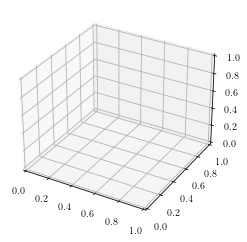

In [25]:

#coef = np.random.rand(10,10)

def plot_Y(ax, coef):
    """Plot the spherical harmonic of degree el and order m on Axes ax."""
    # Grids of polar and azimuthal angles
    theta = torch.linspace(0, np.pi, 100).cuda()
    phi = torch.linspace(0, 2*np.pi, 100).cuda()
    #r = np.linspace(-1, 1, 100)
    # Create a 2-D meshgrid of (theta, phi) angles.
    theta, phi = torch.meshgrid(theta, phi)
    # Calculate the Cartesian coordinates of each point in the mesh.
    # NB In SciPy's sph_harm function the azimuthal coordinate, theta,
    # comes before the polar coordinate, phi.
#    Y = sph_harm(abs(m), el, phi, theta)
 #   f = np.zeros([100,100]).astype('complex128')
    f = torch.complex(torch.zeros(100,100),torch.zeros(100,100)).cuda()
#    print(Y.shape)
#     f = np.
    for l in range(int(np.sqrt(len(coef)))):
        for m in range(-l,l+1):
#            fb = coef[l*(l+1)+m] * sph_harm(abs(m), l, phi, theta)
#            print(m,l)
            fb = coef[l*(l+1)+m] * sfarm(m, l, phi, theta)
#            fb = coef[l*(l+1)+m] * r**l * sph_harm(abs(m), l, phi, theta)
#             if m < 0:
#                 fb = np.sqrt(2) * (-1)**m * fb.imag
#             elif m > 0:
#                 fb = np.sqrt(2) * (-1)**m * fb.real
            f += fb
#    f += coef[l]*r**l*sph_harm(abs(m), el, phi, theta)       
#     Y = f
#     # Linear combination of Y_l,m and Y_l,-m to create the real form.
#     if m < 0:
#         Y = np.sqrt(2) * (-1)**m * Y.imag
#     elif m > 0:
#         Y = np.sqrt(2) * (-1)**m * Y.real
    print(sfarm(m, l, phi, theta))
#    f = f.detach().cpu().numpy()
    
    xyz = torch.zeros(3,100,100).cuda()
    for i,ar in enumerate([torch.sin(theta) * torch.sin(phi),
                    torch.sin(theta) * torch.cos(phi),
                    torch.cos(theta)]):
        xyz[i] = ar
    Yx, Yy, Yz = torch.abs(f) * xyz
    xyz = xyz.detach().cpu().numpy()
    plt.rc('text', usetex=True)




#    Yx, Yy, Yz = torch.abs(f) * xyz
#    print(Yx.shape)
    # Colour the plotted surface according to the sign of Y.
    cmap = plt.cm.ScalarMappable(cmap=plt.get_cmap('PRGn'))
    cmap.set_clim(-0.5, 0.5)

    ax.plot_surface(Yx, Yy, Yz,
                    facecolors=cmap.to_rgba(f.real),
                    rstride=2, cstride=2)
    print(Yz.shape)
    # Draw a set of x, y, z axes for reference.
    ax_lim = 50
    ax.plot([-ax_lim, ax_lim], [0,0], [0,0], c='0.5', lw=1, zorder=10)
    ax.plot([0,0], [-ax_lim, ax_lim], [0,0], c='0.5', lw=1, zorder=10)
    ax.plot([0,0], [0,0], [-ax_lim, ax_lim], c='0.5', lw=1, zorder=10)
    # Set the Axes limits and title, turn off the Axes frame.
#    ax.set_title(r'$Y_{{{},{}}}$'.format(el, m))
    ax_lim = 40
    ax.set_xlim(-ax_lim, ax_lim)
    ax.set_ylim(-ax_lim, ax_lim)
    ax.set_zlim(-ax_lim, ax_lim)
    ax.axis('on')
    return(Yx, Yy, Yz)
#     xyz = np.zeros((np.size(mesh_x), 3))
#     xyz[:, 0] = np.reshape(mesh_x, -1)
#     xyz[:, 1] = np.reshape(mesh_y, -1)
#     xyz[:, 2] = np.reshape(z_norm, -1)
#     pcd = o3d.geometry.PointCloud()
#     pcd.points = o3d.utility.Vector3dVector(xyz)
#     o3d.io.write_point_cloud("../../test_data/sync.ply", pcd)
fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(projection='3d')
#l, m = 2, 0
# coef = [116.40520943, -4.51331063,  -1.22070776, 2.53049672, 1.25615844,\
#    1.59720443,  28.4781262,   -0.33878004,  -4.02484515]
Yx, Yy, Yz = plot_Y(ax, coef)
#plot_Y(ax,6,3)
#plt.savefig('Y{}_{}.png'.format(l, m))
plt.show()

In [167]:
pc = np.zeros((np.size(Yx), 3))
pc[:, 0] = np.reshape(Yx, -1)
pc[:, 1] = np.reshape(Yy, -1)
pc[:, 2] = np.reshape(Yz, -1)

NameError: name 'Yx' is not defined

In [104]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(pc)
o3d.io.write_point_cloud("testply.ply", pcd)

True

In [59]:
pc.shape

(10000, 3)

In [105]:
np.savetxt('testply.ply', pc, delimiter=' ', newline='\n', header='ply\
        format ascii 1.0\
        element vertex 10000\
        property float x\
        property float y\
        property float z\
        end_header', footer='')

In [61]:
import open3d as o3d

In [106]:
print("Load a ply point cloud, print it, and render it")
pcd = o3d.io.read_point_cloud("testply.ply")
print(pcd)
print(np.asarray(pcd.points))
o3d.visualization.draw_geometries([pcd])

Load a ply point cloud, print it, and render it
[Open3D WARNING] Read PLY failed: unable to parse header.
PointCloud with 0 points.
[]


In [66]:
o3d.visualization.draw_geometries(pcd)

TypeError: draw_geometries(): incompatible function arguments. The following argument types are supported:
    1. (geometry_list: List[open3d.cpu.pybind.geometry.Geometry], window_name: str = 'Open3D', width: int = 1920, height: int = 1080, left: int = 50, top: int = 50, point_show_normal: bool = False, mesh_show_wireframe: bool = False, mesh_show_back_face: bool = False) -> None
    2. (geometry_list: List[open3d.cpu.pybind.geometry.Geometry], window_name: str = 'Open3D', width: int = 1920, height: int = 1080, left: int = 50, top: int = 50, point_show_normal: bool = False, mesh_show_wireframe: bool = False, mesh_show_back_face: bool = False, lookat: numpy.ndarray[float64[3, 1]], up: numpy.ndarray[float64[3, 1]], front: numpy.ndarray[float64[3, 1]], zoom: float) -> None

Invoked with: PointCloud with 10000 points.

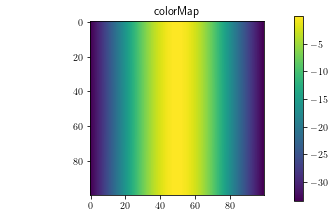

In [39]:
fig = plt.figure(figsize=(6, 3.2))

ax = fig.add_subplot(111)
ax.set_title('colorMap')
plt.imshow(Yk)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()

In [ ]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(xyz)
o3d.io.write_point_cloud("../../test_data/sync.ply", pcd)

In [13]:
# Generate some neat n times 3 matrix using a variant of sync function
x = np.linspace(-3, 3, 401)
mesh_x, mesh_y = np.meshgrid(x, x)
z = np.sinc((np.power(mesh_x, 2) + np.power(mesh_y, 2)))
z_norm = (z - z.min()) / (z.max() - z.min())
pc = np.zeros((np.size(Yx), 3))
pc[:, 0] = np.reshape(Yx, -1)
pc[:, 1] = np.reshape(Yy, -1)
pc[:, 2] = np.reshape(Yz, -1)
print('xyz')
print(xyz)

xyz
[[-3.         -3.          0.17846472]
 [-2.985      -3.          0.17440115]
 [-2.97       -3.          0.17063709]
 ...
 [ 2.97        3.          0.17063709]
 [ 2.985       3.          0.17440115]
 [ 3.          3.          0.17846472]]


In [ ]:
cpt = sum([len(files) for r, d, files in os.walk("/p/home/jusers/cherepashkin1/jureca/cherepashkin1/598csv3")])
print(cpt/4)

In [4]:
import numpy as np

In [6]:
a = np.hstack((np.repeat(128, 3),441))
a[0]

128

In [8]:
import torch

In [9]:
a = torch.zeros([50, 500, 441])
b = torch.zeros([50, 441])

In [12]:
c = torch.matmul(a[0],b[0])
c.shape

torch.Size([500])

In [18]:
nim = 5
for i in range(nim):
    print(str(10*int(36*i/nim)))

0
70
140
210
280


In [17]:
print(np.arange(0,360,10))

[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350]


In [39]:
print(np.random.choice(np.arange(0,360,10), size=10, replace=False))

[ 20 110 230  80 350 270 330 300 170 250]


In [46]:
nim = 10
angles_list = np.random.choice(np.arange(0,360,nim), size=nim, replace=False)
#             str(10*int(36*i/nim))
for i in range(nim):
    print(str(angles_list[i]).zfill(3))
#     img_name = \
#     os.path.join(rd,\
#                  self.landmarks_frame.iloc[idx, 0],\
#     'rotation_'+str(angles_list[i]).zfill(3)+'.tif').replace('\\','/')

120
200
240
210
150
330
290
090
320
100


In [49]:
a = np.array([10*int(36*i/nim) for i in range(nim)])
print(a)

[  0  30  70 100 140 180 210 250 280 320]


In [52]:
s = '598,619'.split(',')
print(s)

['598', '619']


In [54]:
import os

In [59]:
mainpath = '/p/home/jusers/cherepashkin1/jureca/cherepashkin1/'
csvpath = os.path.join(mainpath,str(598),'csv/')
print(csvpath)

/p/home/jusers/cherepashkin1/jureca/cherepashkin1/598/csv/


In [61]:
exec('from experiments.'+'experiment0'+' import cnet')

ModuleNotFoundError: No module named 'experiments'

In [68]:
cd /p/home/jusers/cherepashkin1/jureca/circles/finetune_test
exec('import experiments.'+'e036.'+' cnet')

In [78]:
a = tuple('/p/home/jusers/cherepashkin1/jureca/circles'.split('/')[-2:])
os.path.join(a)

TypeError: expected str, bytes or os.PathLike object, not tuple

In [79]:
a

('jureca', 'circles')

In [74]:
[i+ for i in '/p/home/jusers/cherepashkin1/jureca/circles'.split('/')[-2:]]

SyntaxError: invalid syntax (<ipython-input-74-b80c6eaf362f>, line 1)

In [83]:
a = []
for i in range(5):
    a.append(str(i))
a[1]

'1'

In [86]:
specie = 619
nim = 1
if specie == 619:
    h, w = 2048, 2448
elif specie == 598:
    h, w = 1000, 1800
img = np.zeros([nim,h,w,1])
img.shape

(1, 2048, 2448, 1)